In [1]:
# Import Needed Packages
from skimage.exposure import rescale_intensity
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

In [2]:
def plt_imshow(title, image):
    # Convert Image From BGR To RGB And Display
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

In [3]:
def convolve(image, kernel):
    # Grab Spatial Dims Of Image And Kernel
    (iH, iW) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]
    
    # Allocate Mem For Output Image
    # Pad Image Borders So Spatial Size Not Reduces
    pad = (kW-1) //2
    image = cv2.copyMakeBorder(image,pad,pad,pad,pad,cv2.BORDER_REPLICATE)
    output = np.zeros((iH,iW), dtype="float32")
    
    # Iterate Over Input Image, "Sliding" Kernel Across (x,y)-coords
    # From Left-to-Right And Top-to-Bottom
    for y in np.arange(pad, iH+pad):
        for x in np.arange(pad, iW+pad):
            # Extract ROI Of Image By Extracting
            # *Center* Region Of Current Coord Dims
            roi = image[y-pad:y+pad+1, x-pad:x+pad+1]
            
            # Perform Convolution Via Element-Wise Multiplication
            # Between ROI And Kernel, Then Summing Matrix
            k = (roi*kernel).sum()
            
            # Store Convolved Value In Output (x,y)-Coord
            # Of Output Image
            output[y-pad,x-pad] = k
    
    # Rescale Output Image To Range [0,255]
    output = rescale_intensity(output, in_range=(0,255))
    output = (output*255).astype("uint8")
    
    # Return Output Image
    return output

In [4]:
# Construct Argument Parser And Parse Arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, 
#     help="path to the input image")
# args = vars(ap.parse_args())
args = {"image": "images/3d_pokemon.png"
}

In [5]:
# Construct Average Blurring Kernels Used To Smooth An Image
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

# Construct Sharpening Filter
sharpen = np.array((
    [ 0,-1, 0],
    [-1, 5,-1],
    [ 0, 1, 0]), dtype="int")

# Constuct Laplacian Kernel To Detect Edge-Like Regions
laplacian = np.array((
    [ 0, 1, 0],
    [ 1,-4, 1],
    [ 0, 1, 0]), dtype="int")

# Construct Sobel X-Axis Kernel
sobelX = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")

# Construct Sobel Y-Axis Kernel
sobelY = np.array((
    [-1,-2,-1],
    [ 0, 0, 0],
    [ 1, 2, 1]), dtype="int")

In [6]:
# Construct Kernel Bank
# (List Of Kernels We're Applying Using Both Our Custom
# "Convolve" Function And OpenCVs "filter2D" Function)
kernelBank = (
    ("small_blur", smallBlur),
    ("large_blur", largeBlur),
    ("sharpen", sharpen),
    ("laplacian", laplacian),
    ("sobel_x", sobelX),
    ("sobel_y", sobelY)
)

In [7]:
# Load Input Image And Convert To Grayscale
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

[INFO] Applying small_blur Kernel


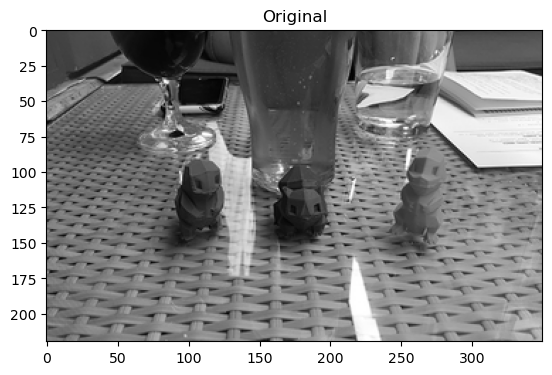

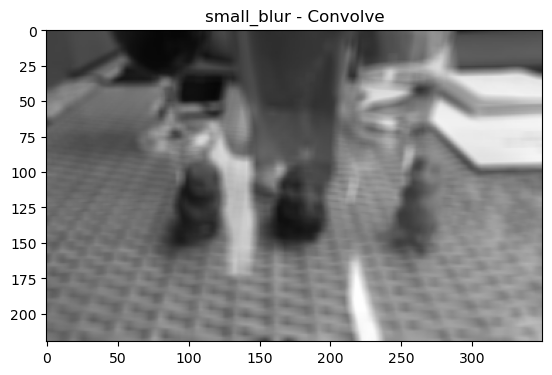

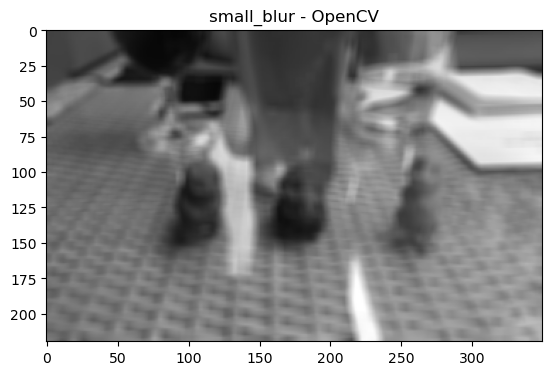

[INFO] Applying large_blur Kernel


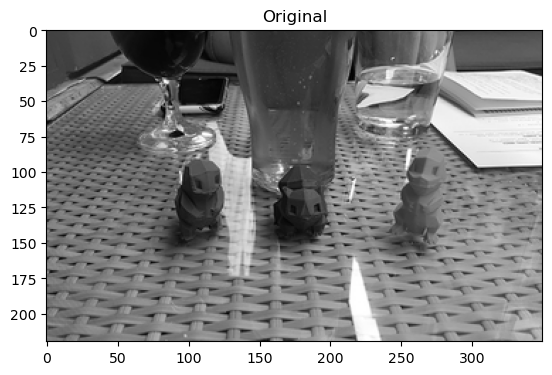

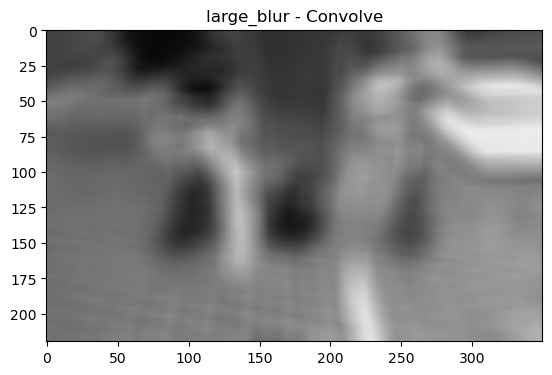

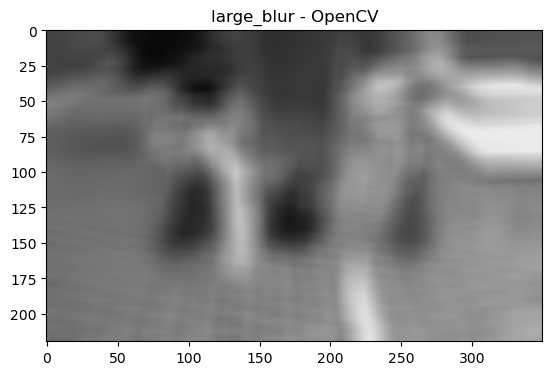

[INFO] Applying sharpen Kernel


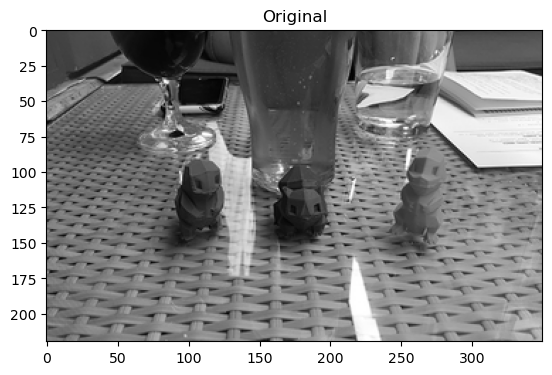

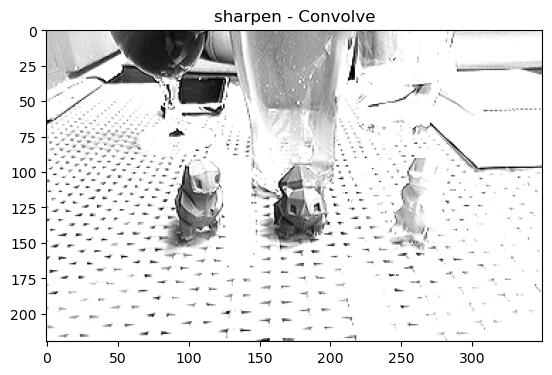

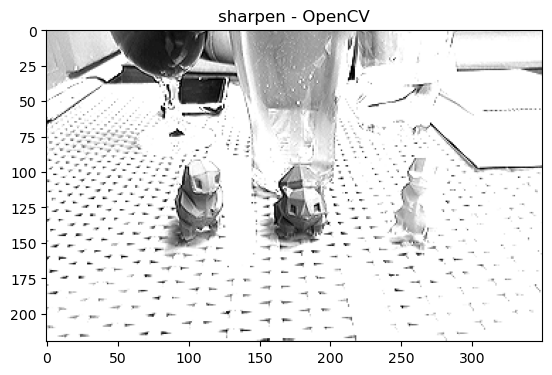

[INFO] Applying laplacian Kernel


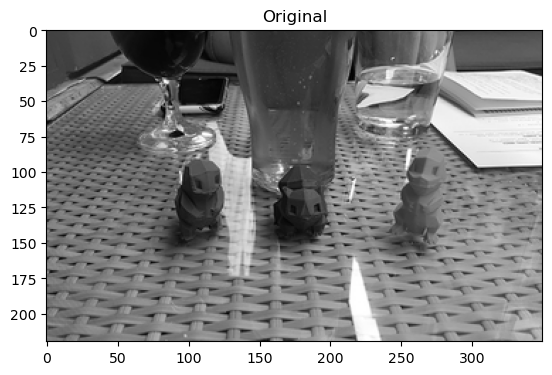

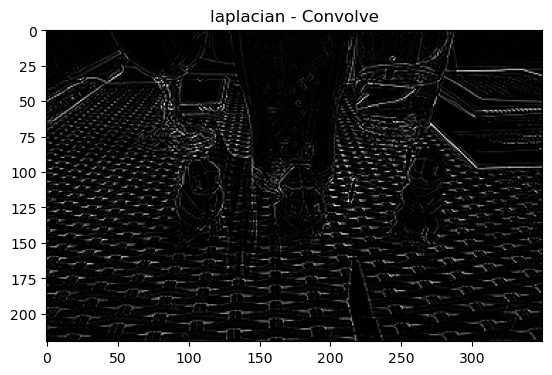

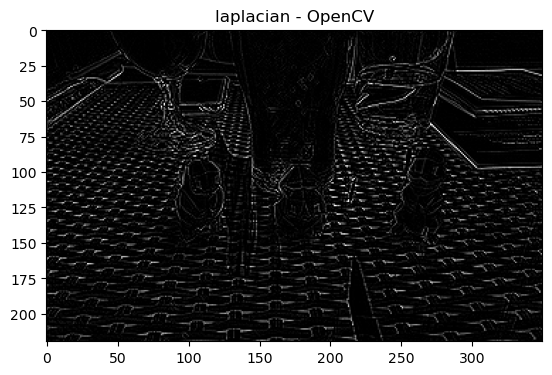

[INFO] Applying sobel_x Kernel


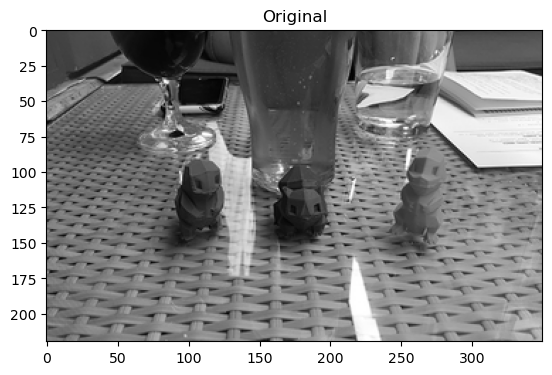

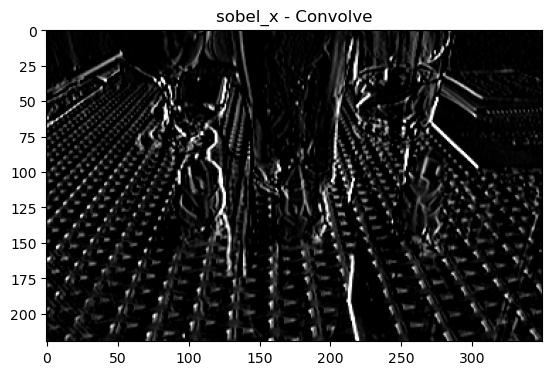

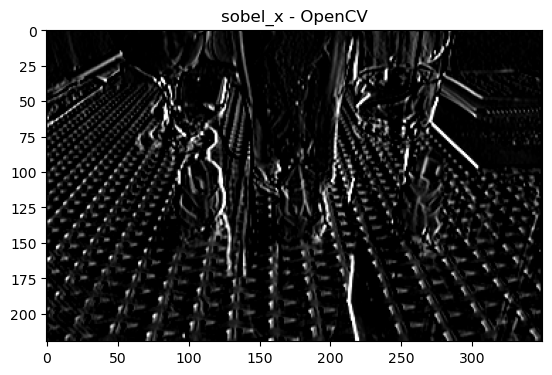

[INFO] Applying sobel_y Kernel


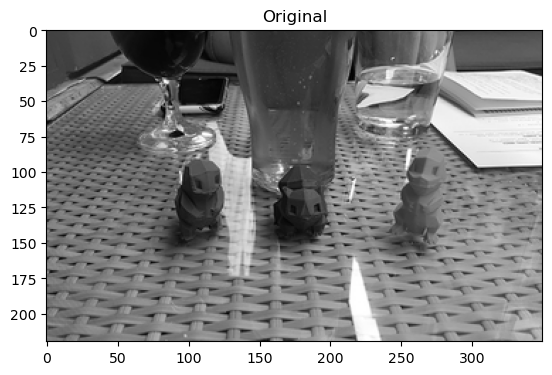

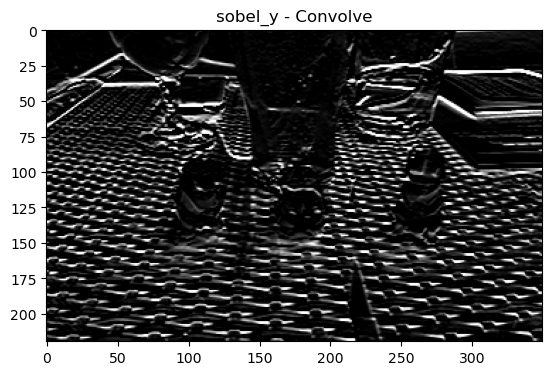

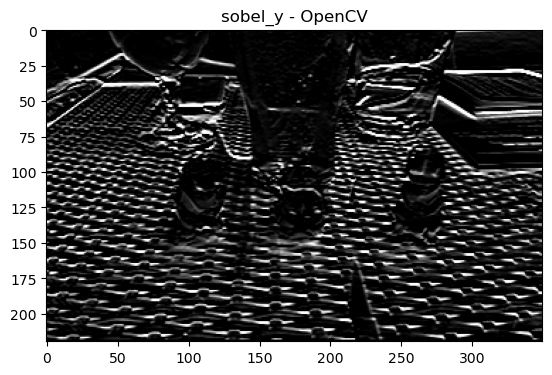

In [8]:
# Iterate Over Kernels
for (kernelName, kernel) in kernelBank:
    # Apply Kernel To Grayscale Image
    # Using Custom Convolve Function And OpenCVs filter2D
    print("[INFO] Applying {} Kernel".format(kernelName))
    convolveOutput = convolve(gray,kernel)
    opencvOutput = cv2.filter2D(gray, -1, kernel)
    
    # Display Output Images
    plt_imshow("Original", gray)
    plt_imshow("{} - Convolve".format(kernelName), convolveOutput)
    plt_imshow("{} - OpenCV".format(kernelName), opencvOutput)